In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [8]:
df.drop('Unnamed: 0',axis =1 , inplace = True)
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [9]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### 'Ram' column

In [10]:
df.Ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [11]:
df['Ram'] = df.Ram.str.replace('GB','')
df.Ram.unique()

array(['8', '16', '4', '2', '12', '6', '32', '24', '64'], dtype=object)

In [12]:
df.Ram = df.Ram.astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), int32(1), object(8)
memory usage: 107.0+ KB


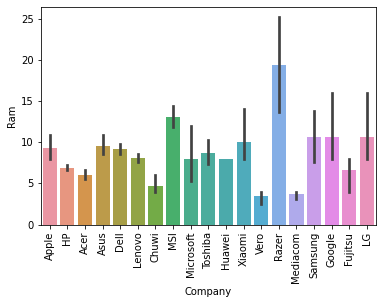

In [13]:
sns.barplot(x='Company',y='Ram', data = df)
plt.xticks(rotation='vertical')
plt.show()

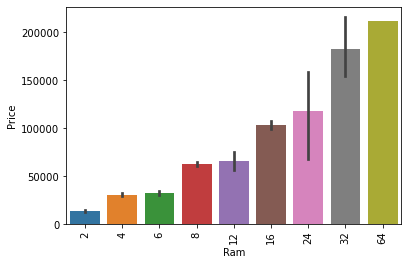

In [14]:
sns.barplot(x='Ram',y='Price', data = df)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


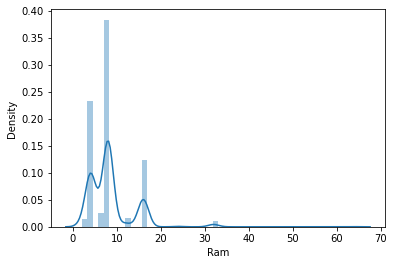

In [15]:
sns.distplot(df['Ram'])
plt.show()

### 'Weight' column

In [16]:
df.Weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [17]:
df['Weight'] = df.Weight.str.replace('kg','')

In [18]:
df.Weight.unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '0.98', '2.5', '1.62', '1.91', '2.3', '1.35',
       '1.88', '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65',
       '2.77', '3.2', '0.69', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4',
       '1.8', '1.9', '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21',
       '2.45', '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23',
       '1.26', '2.16', '2.36', '2.05', '1.32', '1.75', '0.97', '2.9',
       '2.56', '1.48', '1.74', '1.1', '1.56', '2.03', '1.05', '4.4',
       '1.90', '1.29', '2.0', '1.95', '2.06', '1.12', '1.42', '3.49',
       '3.35', '2.23', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08',
       '4.3', '1.68', '1.41', '4.14', '2.18', '2.24', '2.67', '2.14',
       '1.36', '2.25', '2.15', '2.19', '2.54', '3.42', '1.28', '2.33',
       '1.45', '2.79', '1.84', '2.6', '2.26', '3.25', '1.59', '1.13',
       '1.78', '1.10', '1.15', '1.27', '1.43', '2.31', '1.16', '1.64',
   

In [19]:
df['Weight'] = df.Weight.astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


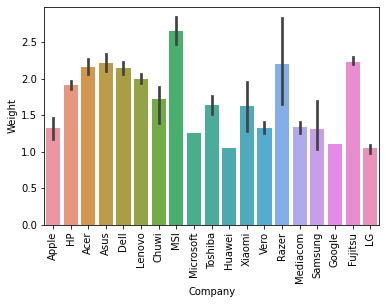

In [20]:
sns.barplot(x='Company',y='Weight', data = df)
plt.xticks(rotation='vertical')
plt.show()

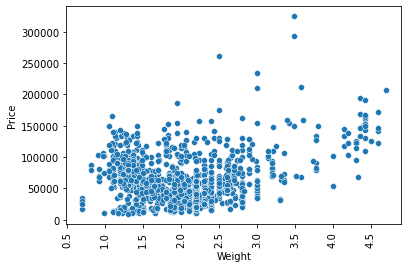

In [21]:
sns.scatterplot(x='Weight',y='Price', data = df)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


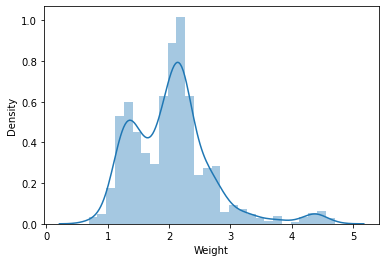

In [22]:
sns.distplot(df['Weight'])
plt.show()

### 'Inches' column

In [23]:
df.Inches.unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

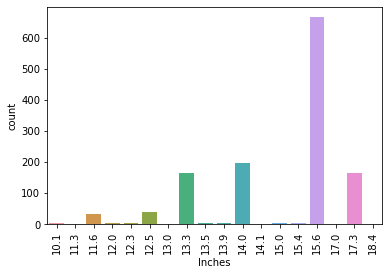

In [24]:
sns.countplot(x = 'Inches', data = df)
plt.xticks(rotation='vertical')
plt.show()

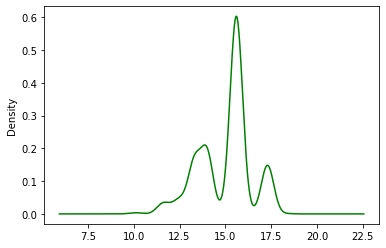

In [25]:
df['Inches'].plot.density(color = 'green')
plt.show()

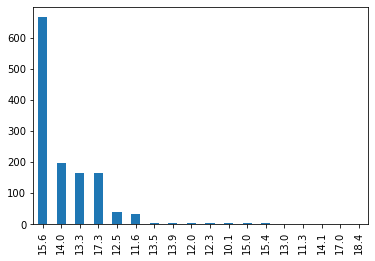

In [26]:
df['Inches'].value_counts().plot(kind = 'bar')
plt.show()

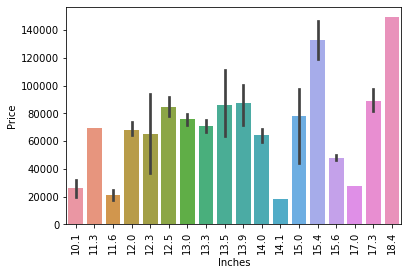

In [27]:
sns.barplot(x='Inches',y='Price', data = df)
plt.xticks(rotation='vertical')
plt.show()

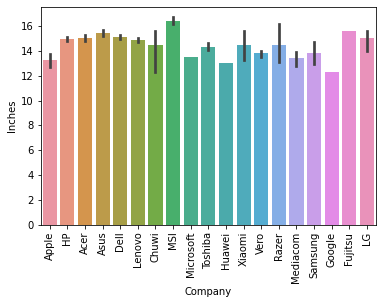

In [28]:
sns.barplot(x='Company',y='Inches', data = df)
plt.xticks(rotation='vertical')
plt.show()

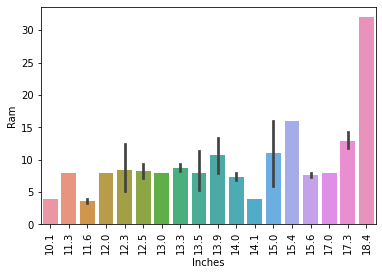

In [29]:
sns.barplot(x='Inches',y='Ram', data = df)
plt.xticks(rotation='vertical')
plt.show()

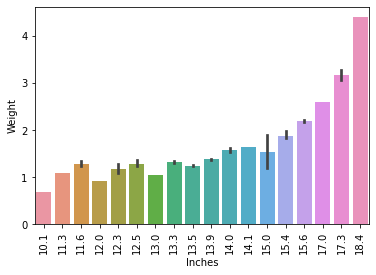

In [30]:
sns.barplot(x='Inches',y='Weight', data = df)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


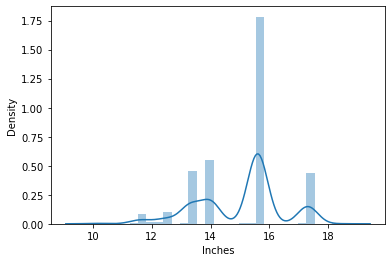

In [31]:
sns.distplot(df['Inches'])
plt.show()

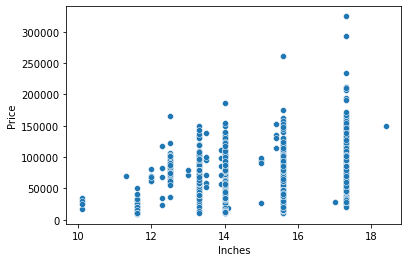

In [32]:
sns.scatterplot(x = 'Inches', y = 'Price', data = df)
plt.show()

<b> No need to clean the data in column 'Inches'. Only we have done visualization.

### Visualization

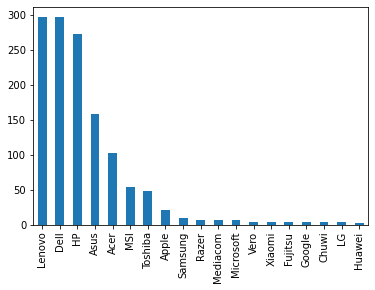

In [33]:
df['Company'].value_counts().plot(kind = 'bar')
plt.show()

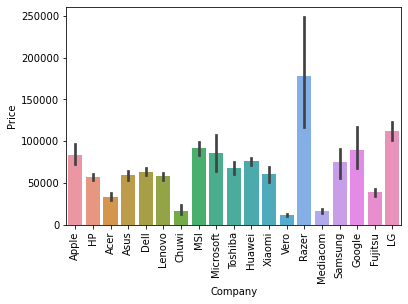

In [34]:
sns.barplot(x = 'Company', y = 'Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

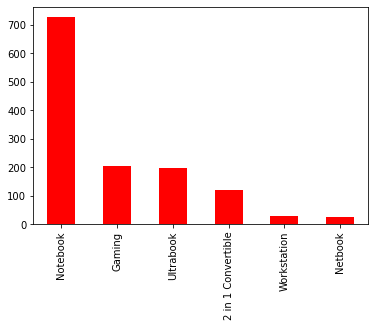

In [35]:
df['TypeName'].value_counts().plot(kind = 'bar', color = 'red')
plt.show()

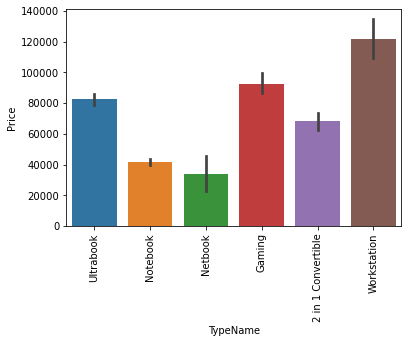

In [36]:
sns.barplot(x = 'TypeName', y = 'Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

### 'ScreenResolution' column

In [37]:
df.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [38]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

## Feature Engineering in 'ScreenResolution' Column

### 1. Laptops with Touchscreen

In [39]:
df['Touchscreen'] = df.ScreenResolution.apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [40]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
554,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63,68198.4000,0
1236,HP,Ultrabook,14.0,2560x1440,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.54,117119.5632,0
29,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,47738.8800,0
97,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 M430,Linux,2.20,25840.8000,0
217,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.63,54931.6800,0


In [41]:
df.Touchscreen.value_counts() # Number of Touchscreen laptops

0    1111
1     192
Name: Touchscreen, dtype: int64

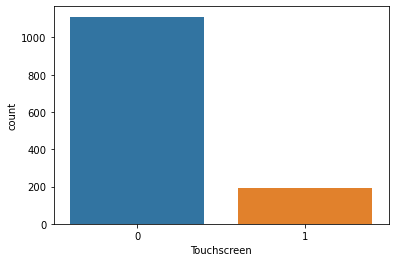

In [42]:
sns.countplot(x = 'Touchscreen', data = df)
plt.show()

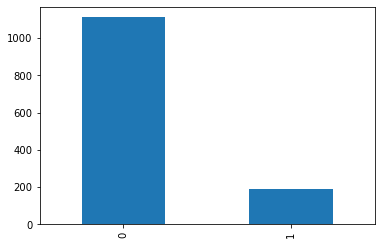

In [43]:
df['Touchscreen'].value_counts().plot(kind = 'bar')
plt.show()

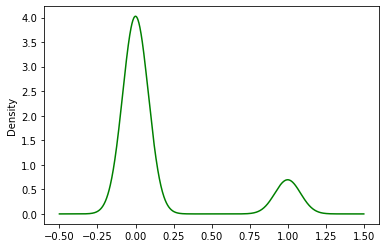

In [44]:
df['Touchscreen'].plot.density(color = 'green')
plt.show()

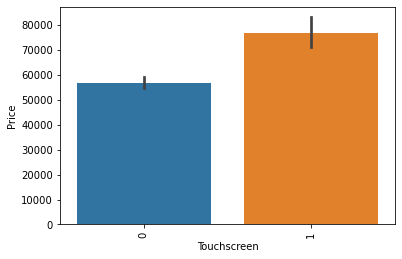

In [45]:
sns.barplot(x = 'Touchscreen', y = 'Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

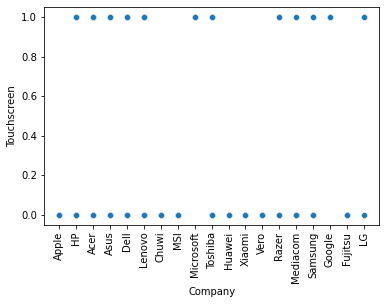

In [46]:
sns.scatterplot(x = 'Company', y = 'Touchscreen', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

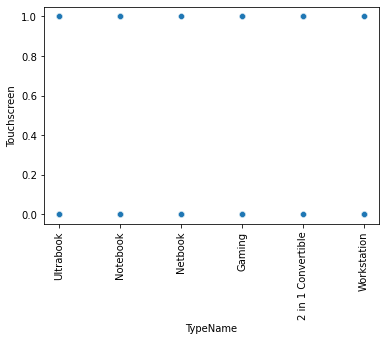

In [47]:
sns.scatterplot(x = 'TypeName', y = 'Touchscreen', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

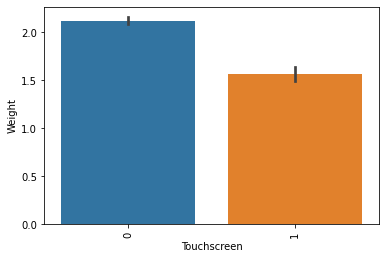

In [48]:
sns.barplot(x = 'Touchscreen', y = 'Weight', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

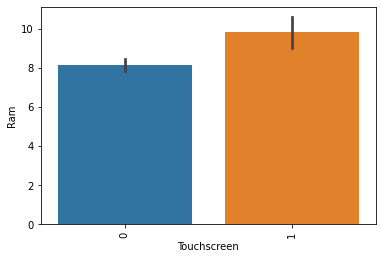

In [49]:
sns.barplot(x = 'Touchscreen', y = 'Ram', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

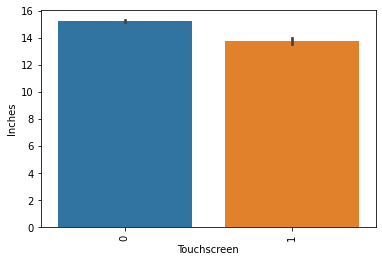

In [50]:
sns.barplot(x = 'Touchscreen', y = 'Inches', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

### 2. Laptops with IPS Panel

In [51]:
df['IPS_Panel'] = df.ScreenResolution.apply(lambda x: 1 if 'IPS Panel' in x else 0)

In [52]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,500GB HDD,Intel HD Graphics,Windows 10,2.20,20193.12,0,0
957,HP,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,256GB SSD,Intel HD Graphics 505,Windows 10,1.45,41292.00,1,0
540,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,74538.72,1,0
1075,Lenovo,Notebook,17.3,1600x900,Intel Core i5 6200U 2.3GHz,8,1.0TB HDD,AMD Radeon R5 M330,Windows 10,3.00,35111.52,0,0
645,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics,Windows 10,1.43,14598.72,0,0


In [53]:
df.IPS_Panel.value_counts() # Number of Touchscreen laptops

0    938
1    365
Name: IPS_Panel, dtype: int64

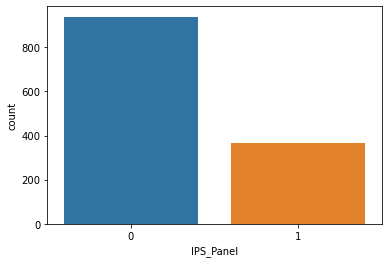

In [54]:
sns.countplot(x = 'IPS_Panel', data = df)
plt.show()

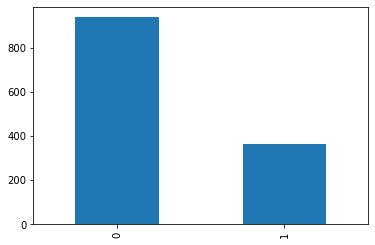

In [55]:
df['IPS_Panel'].value_counts().plot(kind = 'bar')
plt.show()

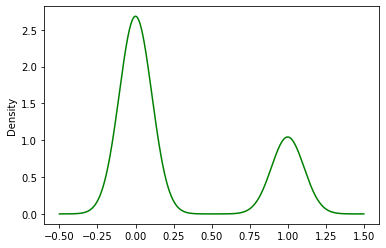

In [56]:
df['IPS_Panel'].plot.density(color = 'green')
plt.show()

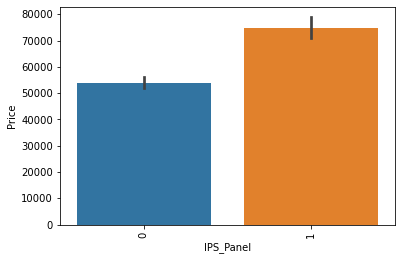

In [57]:
sns.barplot(x = 'IPS_Panel', y = 'Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

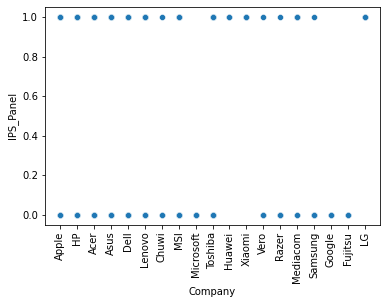

In [58]:
sns.scatterplot(x = 'Company', y = 'IPS_Panel', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

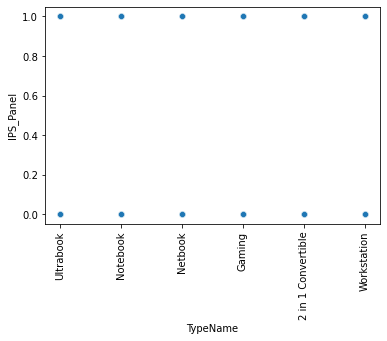

In [59]:
sns.scatterplot(x = 'TypeName', y = 'IPS_Panel', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

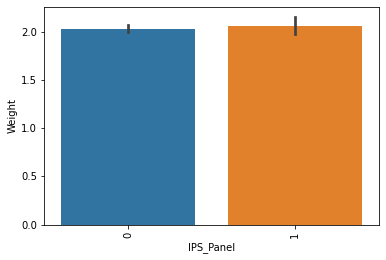

In [60]:
sns.barplot(x = 'IPS_Panel', y = 'Weight', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

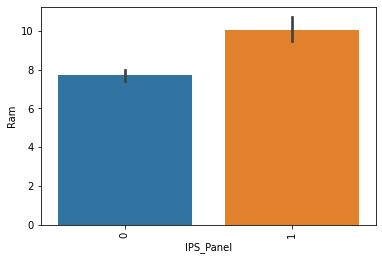

In [61]:
sns.barplot(x = 'IPS_Panel', y = 'Ram', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

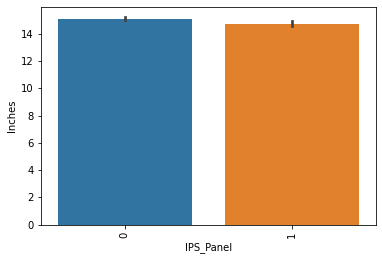

In [62]:
sns.barplot(x = 'IPS_Panel', y = 'Inches', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

### 3. Extracting HD Features

In [63]:
df['Full_HD'] = df.ScreenResolution.apply(lambda x: 1 if 'Full HD' in x else 0)

In [64]:
df['Quad_HD+'] = df.ScreenResolution.apply(lambda x: 1 if 'Quad HD+' in x else 0)

In [65]:
df['4K_Ultra_HD'] = df.ScreenResolution.apply(lambda x: 1 if '4K Ultra HD' in x else 0)

In [66]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD
676,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.100,60472.80,0,0,1,0,0
1185,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.591,48431.52,0,1,1,0,0
1114,Lenovo,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Android,0.690,29250.72,1,1,0,0,0
299,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,1.630,78215.04,0,0,1,0,0
493,Acer,Notebook,15.6,1366x768,AMD A10-Series 9620P 2.5GHz,8,1TB HDD,AMD Radeon RX 540,Windows 10,2.200,30849.12,0,0,0,0,0


In [67]:
df['Full_HD'].value_counts()

1    843
0    460
Name: Full_HD, dtype: int64

In [68]:
df['Quad_HD+'].value_counts()

0    1273
1      30
Name: Quad_HD+, dtype: int64

In [69]:
df['4K_Ultra_HD'].value_counts()

0    1260
1      43
Name: 4K_Ultra_HD, dtype: int64

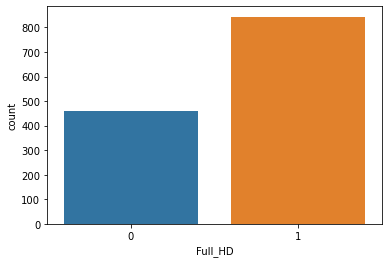

In [70]:
sns.countplot(x = 'Full_HD', data = df)
plt.show()

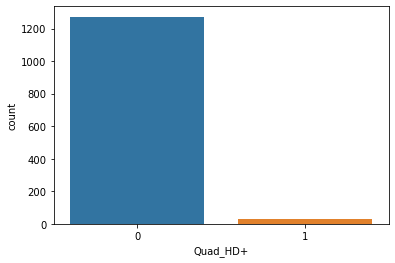

In [71]:
sns.countplot(x = 'Quad_HD+', data = df)
plt.show()

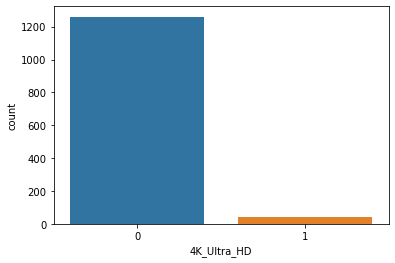

In [72]:
sns.countplot(x = '4K_Ultra_HD', data = df)
plt.show()

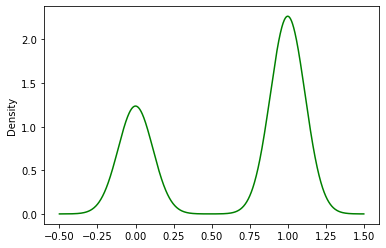

In [73]:
df['Full_HD'].plot.density(color = 'green')
plt.show()

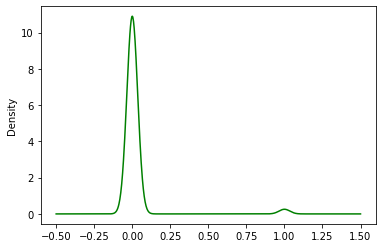

In [74]:
df['Quad_HD+'].plot.density(color = 'green')
plt.show()

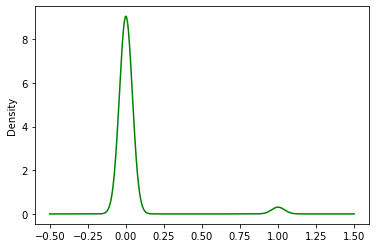

In [75]:
df['4K_Ultra_HD'].plot.density(color = 'green')
plt.show()

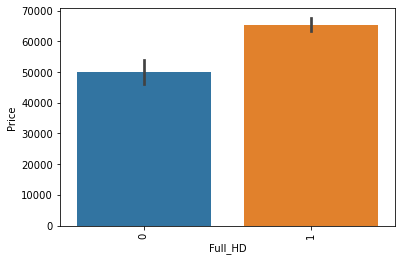

In [76]:
sns.barplot(x = 'Full_HD', y = 'Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

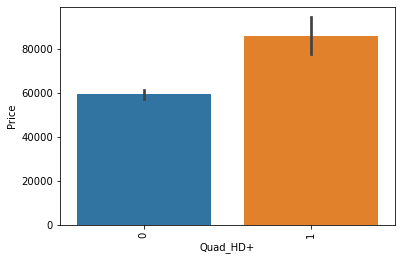

In [77]:
sns.barplot(x = 'Quad_HD+', y = 'Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

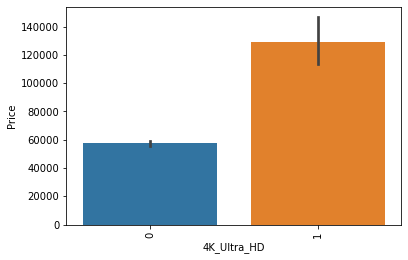

In [78]:
sns.barplot(x = '4K_Ultra_HD', y = 'Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

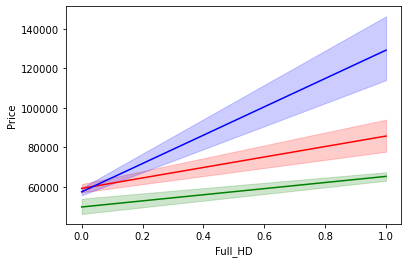

In [79]:
sns.lineplot(x = 'Full_HD', y = 'Price',color= 'green',data = df)
sns.lineplot(x = 'Quad_HD+', y = 'Price',color= 'red',data = df)
sns.lineplot(x = '4K_Ultra_HD', y = 'Price',color= 'blue',data = df)
plt.show()

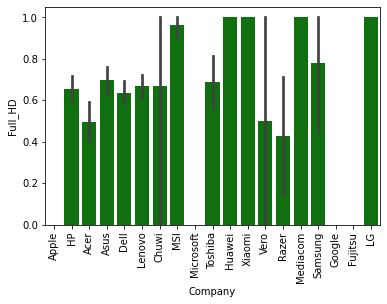

In [80]:
sns.barplot(x = 'Company', y = 'Full_HD',color= 'green',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

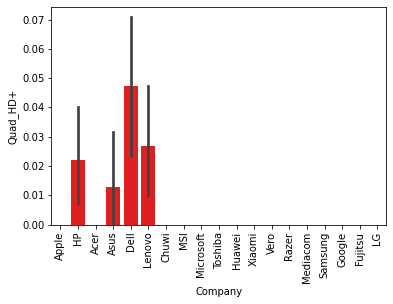

In [81]:
sns.barplot(x = 'Company', y = 'Quad_HD+',color= 'red',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

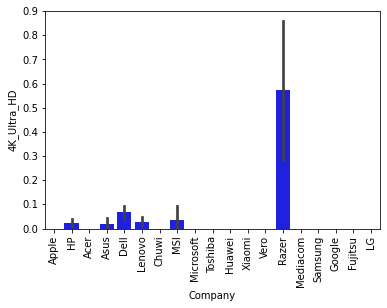

In [82]:
sns.barplot(x = 'Company', y = '4K_Ultra_HD',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

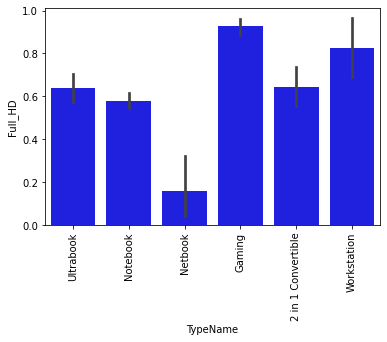

In [83]:
sns.barplot(x = 'TypeName', y = 'Full_HD',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

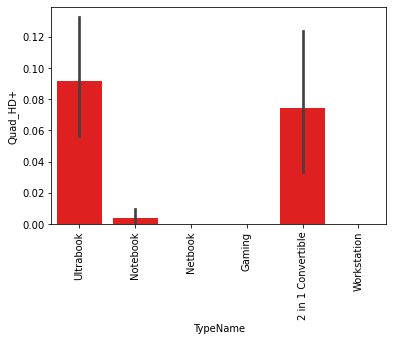

In [84]:
sns.barplot(x = 'TypeName', y = 'Quad_HD+',color= 'red',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

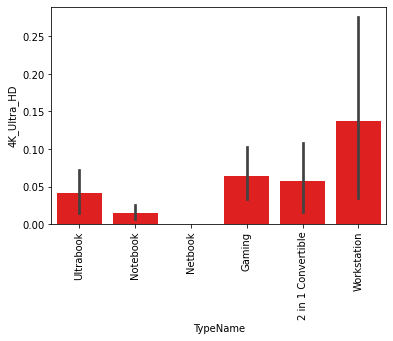

In [85]:
sns.barplot(x = 'TypeName', y = '4K_Ultra_HD',color= 'red',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

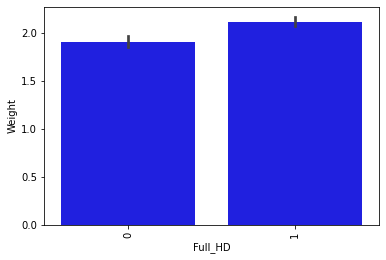

In [86]:
sns.barplot(y = 'Weight', x = 'Full_HD',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

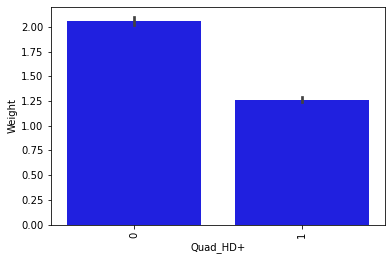

In [87]:
sns.barplot(y = 'Weight', x = 'Quad_HD+',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

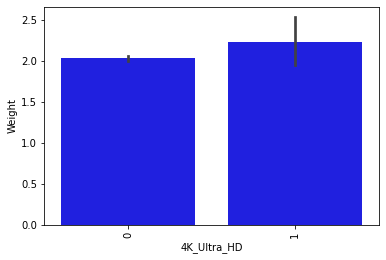

In [88]:
sns.barplot(y = 'Weight', x = '4K_Ultra_HD',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

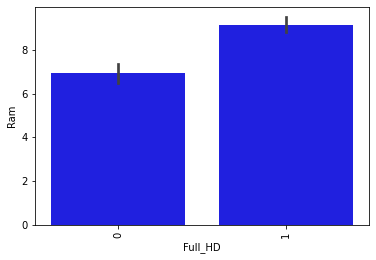

In [89]:
sns.barplot(x = 'Full_HD',y= 'Ram',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

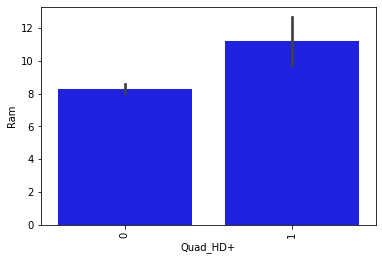

In [90]:
sns.barplot(x = 'Quad_HD+',y= 'Ram',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

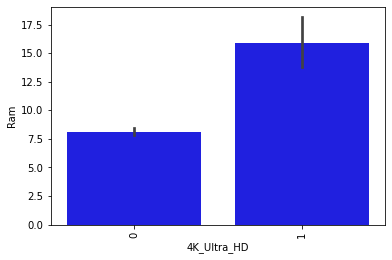

In [91]:
sns.barplot(x = '4K_Ultra_HD',y= 'Ram',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

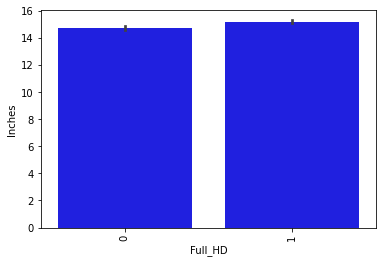

In [92]:
sns.barplot(x = 'Full_HD',y= 'Inches',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

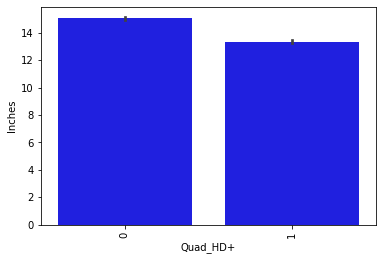

In [93]:
sns.barplot(x = 'Quad_HD+',y= 'Inches',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

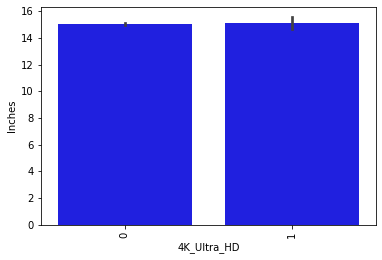

In [94]:
sns.barplot(x = '4K_Ultra_HD',y= 'Inches',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

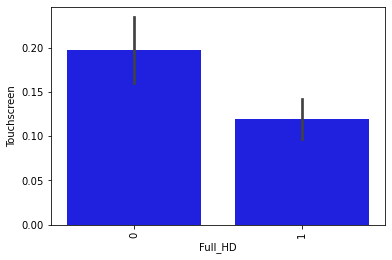

In [95]:
sns.barplot(x = 'Full_HD',y= 'Touchscreen',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

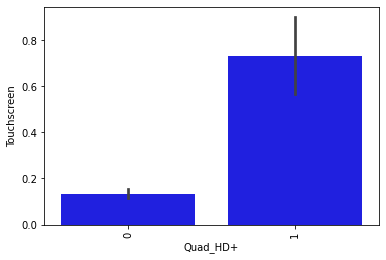

In [96]:
sns.barplot(x = 'Quad_HD+',y= 'Touchscreen',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

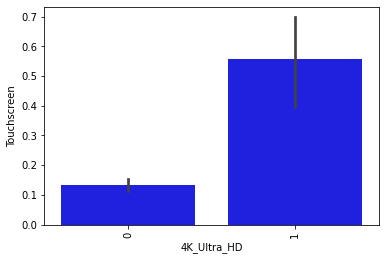

In [97]:
sns.barplot(x = '4K_Ultra_HD',y= 'Touchscreen',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

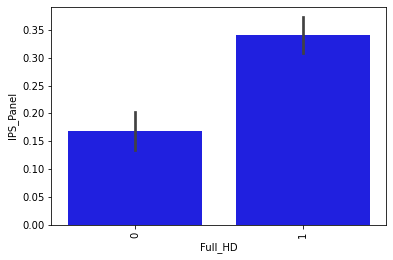

In [98]:
sns.barplot(x = 'Full_HD',y= 'IPS_Panel',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

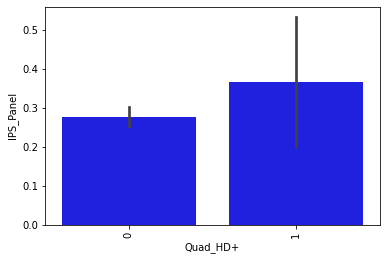

In [99]:
sns.barplot(x = 'Quad_HD+',y= 'IPS_Panel',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

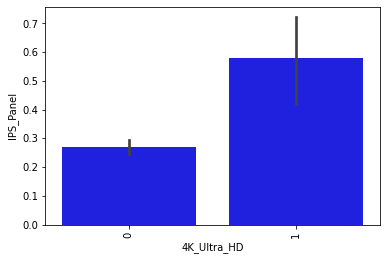

In [100]:
sns.barplot(x = '4K_Ultra_HD',y= 'IPS_Panel',color= 'blue',data = df)
plt.xticks(rotation = 'vertical')

plt.show()

### 4. Extracting Resolution Features

In [101]:
df.shape

(1303, 16)

In [102]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [103]:
df['Resolution'] = df.ScreenResolution.str.split().str.get(-1)

In [104]:
df['Resolution'].unique()

array(['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768',
       '2304x1440', '3200x1800', '1920x1200', '2256x1504', '3840x2160',
       '2160x1440', '2560x1440', '1600x900', '2736x1824', '2400x1600'],
      dtype=object)

In [105]:
df['X_Resolution'] = df['Resolution'].str.split('x').str.get(0)
df['Y_Resolution'] = df['Resolution'].str.split('x').str.get(1)

In [106]:
df['X_Resolution'].unique()

array(['2560', '1440', '1920', '2880', '1366', '2304', '3200', '2256',
       '3840', '2160', '1600', '2736', '2400'], dtype=object)

In [107]:
df['Y_Resolution'].unique()

array(['1600', '900', '1080', '1800', '768', '1440', '1200', '1504',
       '2160', '1824'], dtype=object)

In [108]:
df['X_Resolution'] = df['X_Resolution'].astype(int)
df['Y_Resolution'] = df['Y_Resolution'].astype(int)

In [109]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,Resolution,X_Resolution,Y_Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,0,0,2560x1600,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,0,1440x900,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,0,0,1920x1080,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,0,0,2880x1800,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,0,0,2560x1600,2560,1600


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS_Panel         1303 non-null   int64  
 13  Full_HD           1303 non-null   int64  
 14  Quad_HD+          1303 non-null   int64  
 15  4K_Ultra_HD       1303 non-null   int64  
 16  Resolution        1303 non-null   object 


In [111]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS_Panel       0.252208
Full_HD         0.198612
Quad_HD+        0.106643
4K_Ultra_HD     0.343982
X_Resolution    0.556529
Y_Resolution    0.552809
Name: Price, dtype: float64

<b> The above observation shows that X_Resolution and Y_Resolution have strong correlation with Price

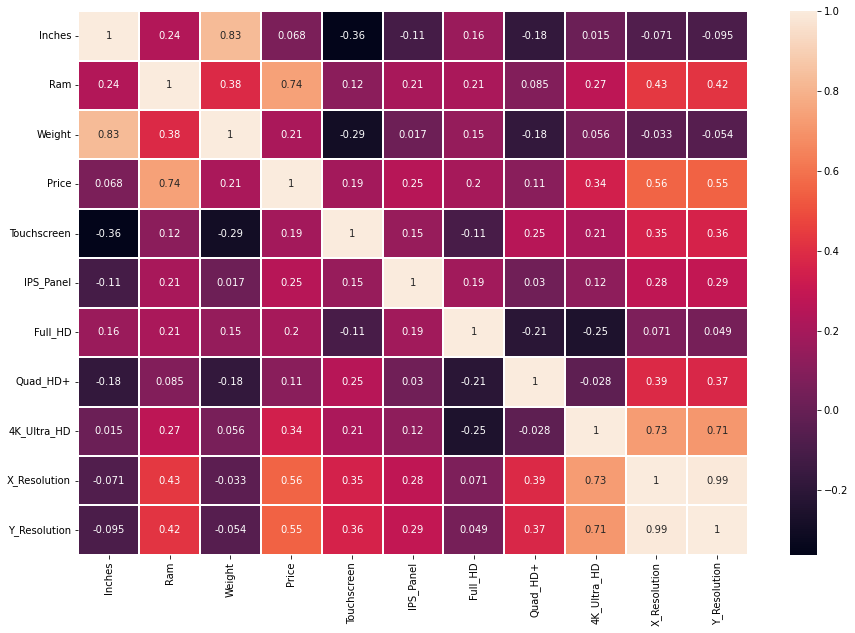

In [112]:
fig, ax = plt.subplots(figsize=(15,10)) # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.3, ax=ax)
plt.show()

In [113]:
df['ppi'] = (((df['X_Resolution']**2) + (df['Y_Resolution']**2))**0.5/df['Inches']).astype('float')
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,Resolution,X_Resolution,Y_Resolution,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,0,0,2560x1600,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,0,1440x900,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,0,0,1920x1080,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,0,0,2880x1800,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,0,0,2560x1600,2560,1600,226.983005


In [114]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS_Panel       0.252208
Full_HD         0.198612
Quad_HD+        0.106643
4K_Ultra_HD     0.343982
X_Resolution    0.556529
Y_Resolution    0.552809
ppi             0.473487
Name: Price, dtype: float64

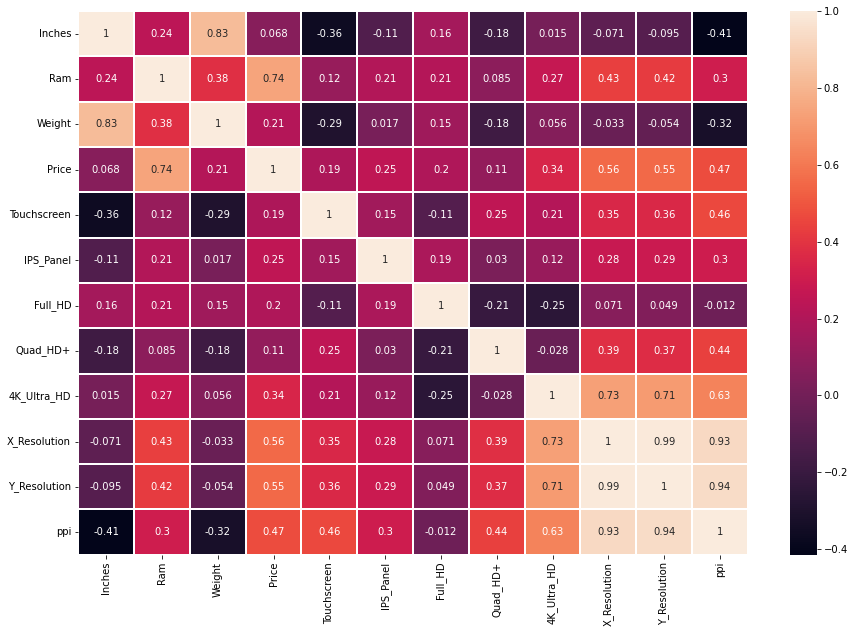

In [115]:
fig, ax = plt.subplots(figsize=(15,10)) # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.3, ax=ax)
plt.show()

<b> ppi has strong correlation with price. So now we will drop Inches,Resolution, X_Resolution and Y_Resolution columns.

In [116]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'IPS_Panel',
       'Full_HD', 'Quad_HD+', '4K_Ultra_HD', 'Resolution', 'X_Resolution',
       'Y_Resolution', 'ppi'],
      dtype='object')

In [117]:
df.drop(['ScreenResolution','Resolution','X_Resolution','Y_Resolution','Inches'],axis =1, inplace = True)

In [118]:
df.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,0,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,0,0,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,0,0,226.983005


### 'Cpu' Column

In [119]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M7-6Y75 1.2GHz      1
Intel Core i5 7200U 2.70GHz      1
Intel Core i7 6920HQ 2.9GHz      1
Intel Core i5 7500U 2.7GHz       1
Intel Core i5 2.9GHz             1
Name: Cpu, Length: 118, dtype: int64

### Features Extraction in 'Cpu' Column

In [120]:
# Extracting first 3 words
df['Cpu Name'] = df['Cpu'].str.split(' ').str.slice(0,3).str.join(' ') # OR df['Cpu'].apply(lambda x: ' '.join(x.split()[0:3])),   .join(' ') is basically used to store in string form

In [121]:
df['Cpu Name'].sample(10)

210     Intel Core i7
1171    Intel Core i7
198     Intel Core i7
66      Intel Core i3
885     Intel Core i5
554     Intel Core i7
832     Intel Core i5
757     Intel Core i7
516     Intel Core i5
511     Intel Core i7
Name: Cpu Name, dtype: object

In [122]:
df.head(4)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,0,0,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,0,0,220.534624,Intel Core i7


In [123]:
# Extracting Other Processor Features

def fetch_processor(text):
    if text == 'Intel Core i5' or text =='Intel Core i3' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [124]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [125]:
df['Cpu brand'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

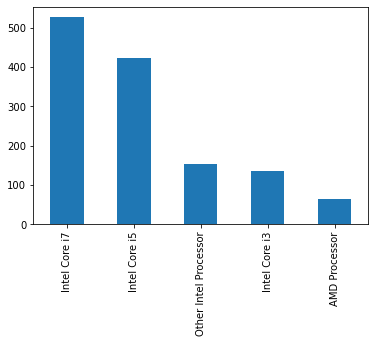

In [126]:
df['Cpu brand'].value_counts().plot(kind = 'bar')
plt.show()

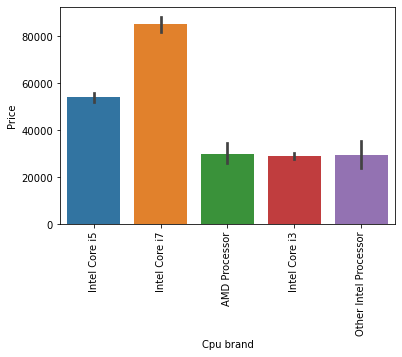

In [127]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [128]:
df.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,0,0,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,0,0,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,0,0,226.983005,Intel Core i5,Intel Core i5


In [129]:
# Extraction of Speed

In [130]:
df['speed'] = df['Cpu'].str.split(' ').str.get(-1)

In [131]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,ppi,Cpu Name,Cpu brand,speed
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,0,0,226.983005,Intel Core i5,Intel Core i5,2.3GHz
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,0,127.677940,Intel Core i5,Intel Core i5,1.8GHz
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,0,0,141.211998,Intel Core i5,Intel Core i5,2.5GHz


In [132]:
df['speed'] = df.speed.str.replace('GHz','')

In [133]:
df['speed'] = df.speed.astype(float)

In [134]:
df.speed.unique()

array([2.3 , 1.8 , 2.5 , 2.7 , 3.1 , 3.  , 2.2 , 1.6 , 2.  , 2.8 , 1.2 ,
       2.9 , 2.4 , 1.44, 1.5 , 1.9 , 1.1 , 1.3 , 2.6 , 3.6 , 3.2 , 1.  ,
       2.1 , 0.9 , 1.92])

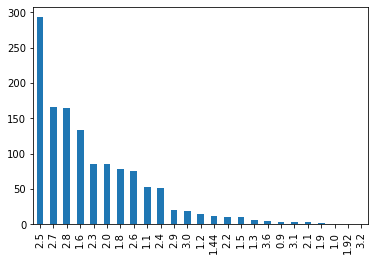

In [135]:
df['speed'].value_counts().plot(kind= 'bar')
plt.show()

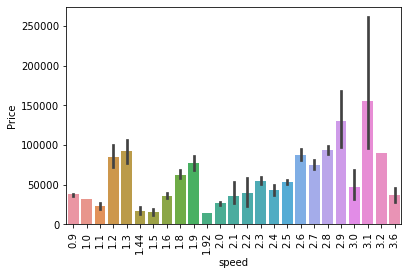

In [136]:
sns.barplot(x = 'speed', y = 'Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

In [137]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)
df.head(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,ppi,Cpu brand,speed
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,0,0,226.983005,Intel Core i5,2.3
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,0,127.677940,Intel Core i5,1.8
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,0,0,141.211998,Intel Core i5,2.5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,0,0,220.534624,Intel Core i7,2.7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,0,0,226.983005,Intel Core i5,3.1


### 'Ram' Column

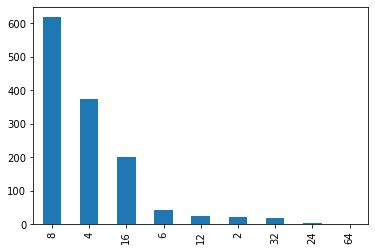

In [138]:
df['Ram'].value_counts().plot(kind= 'bar')
plt.show()

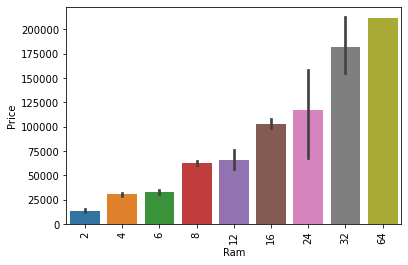

In [139]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float32
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   IPS_Panel    1303 non-null   int64  
 10  Full_HD      1303 non-null   int64  
 11  Quad_HD+     1303 non-null   int64  
 12  4K_Ultra_HD  1303 non-null   int64  
 13  ppi          1303 non-null   float64
 14  Cpu brand    1303 non-null   object 
 15  speed        1303 non-null   float64
dtypes: float32(1), float64(3), int32(1), int64(5), object(6)
memory usage: 152.8+ KB


### 'Memory' Column

In [141]:
df['Memory'].head(30)

0                  128GB SSD
1        128GB Flash Storage
2                  256GB SSD
3                  512GB SSD
4                  256GB SSD
5                  500GB HDD
6        256GB Flash Storage
7        256GB Flash Storage
8                  512GB SSD
9                  256GB SSD
10                 500GB HDD
11                 500GB HDD
12                 256GB SSD
13                 256GB SSD
14                 256GB SSD
15                 256GB SSD
16                 256GB SSD
17                 512GB SSD
18                   1TB HDD
19                 128GB SSD
20        32GB Flash Storage
21      128GB SSD +  1TB HDD
22                 500GB HDD
23                 256GB SSD
24                 256GB SSD
25                   1TB HDD
26       128GB Flash Storage
27                 256GB SSD
28    256GB SSD +  256GB SSD
29                   1TB HDD
Name: Memory, dtype: object

### Feature Extraction of HDD, SSD, Hybrid and Flash Storage from 'Memory' Column

In [142]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True) # Converting integer into str, and replace . and 0

In [143]:
# Conversion of units into GB values
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [144]:
new = df["Memory"].str.split("+", n = 1, expand = True)

In [145]:
df["first"]= new[0]

In [146]:
df['first'] = df['first'].str.strip()

In [147]:
df['first'].value_counts()

256 SSD              500
1000 HDD             225
128 SSD              172
512 SSD              138
500 HDD              132
32 Flash Storage      38
2000 HDD              16
64 Flash Storage      16
1000 SSD              16
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
32 HDD                 1
240 SSD                1
508 Hybrid             1
128 HDD                1
64 SSD                 1
8 SSD                  1
Name: first, dtype: int64

In [148]:
df["second"]= new[1]

In [149]:
df['second'].value_counts()

  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  500 HDD          2
  1000 Hybrid      2
  512 SSD          1
Name: second, dtype: int64

In [150]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)

In [151]:
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)

In [152]:
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)

In [153]:
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [154]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,...,4K_Ultra_HD,ppi,Cpu brand,speed,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,226.983005,Intel Core i5,2.3,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,127.677940,Intel Core i5,1.8,128 Flash Storage,None,0,0,0,1


In [155]:
# df['first'].str.replace(r'\d', '') # # \D metacharacter matches any digits.

In [156]:
df['first'] = df['first'].str.replace(r'\D', '') # \D metacharacter matches non-digit characters. So we are replcing non digit character with ''

C:\Users\Admin\AppData\Local\Temp\ipykernel_8924\1639946136.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '') # \D metacharacter matches non-digit characters. So we are replcing non digit character with ''


In [157]:
df["second"].fillna("0", inplace = True)

In [158]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8924\2245375830.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [159]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,1,0,0,0,0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Ram                  1303 non-null   int32  
 3   Memory               1303 non-null   object 
 4   Gpu                  1303 non-null   object 
 5   OpSys                1303 non-null   object 
 6   Weight               1303 non-null   float32
 7   Price                1303 non-null   float64
 8   Touchscreen          1303 non-null   int64  
 9   IPS_Panel            1303 non-null   int64  
 10  Full_HD              1303 non-null   int64  
 11  Quad_HD+             1303 non-null   int64  
 12  4K_Ultra_HD          1303 non-null   int64  
 13  ppi                  1303 non-null   float64
 14  Cpu brand            1303 non-null   object 
 15  speed                1303 non-null   f

In [161]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [162]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])


In [163]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,1,0,0,0,0,0,0,0,128


In [164]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,ppi,Cpu brand,speed,HDD,SSD,Hybrid,Flash_Storage
309,HP,Notebook,4,1000 HDD,Intel HD Graphics 520,Windows 10,1.86,24988.3200,0,0,1,0,0,141.211998,Intel Core i3,2.0,1000,0,0,0
25,Dell,Notebook,4,1000 HDD,Intel HD Graphics 520,Windows 10,2.30,22305.1392,0,0,0,0,0,100.454670,Intel Core i3,2.0,1000,0,0,0
525,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 7,2.02,71395.2000,0,0,1,0,0,157.350512,Intel Core i5,2.3,0,256,0,0
729,HP,Notebook,4,1000 HDD,AMD Radeon 520,Windows 10,2.10,26053.9200,0,0,1,0,0,141.211998,AMD Processor,3.0,1000,0,0,0
1143,HP,Workstation,8,256 SSD,Nvidia Quadro M1000M,Windows 7,2.59,118761.1200,0,1,1,0,0,141.211998,Intel Core i7,2.6,0,256,0,0


In [165]:
df.drop(columns=['Memory'],inplace=True)
df.sample(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,ppi,Cpu brand,speed,HDD,SSD,Hybrid,Flash_Storage
300,Asus,Notebook,4,Intel HD Graphics 620,Windows 10,1.3,27119.52,0,0,0,0,0,111.935204,Intel Core i3,2.4,0,128,0,0
1263,Acer,Notebook,4,Intel HD Graphics 400,Linux,2.4,15397.92,0,0,0,0,0,100.454670,Other Intel Processor,1.6,500,0,0,0


In [166]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS_Panel        0.252208
Full_HD          0.198612
Quad_HD+         0.106643
4K_Ultra_HD      0.343982
ppi              0.473487
speed            0.430293
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

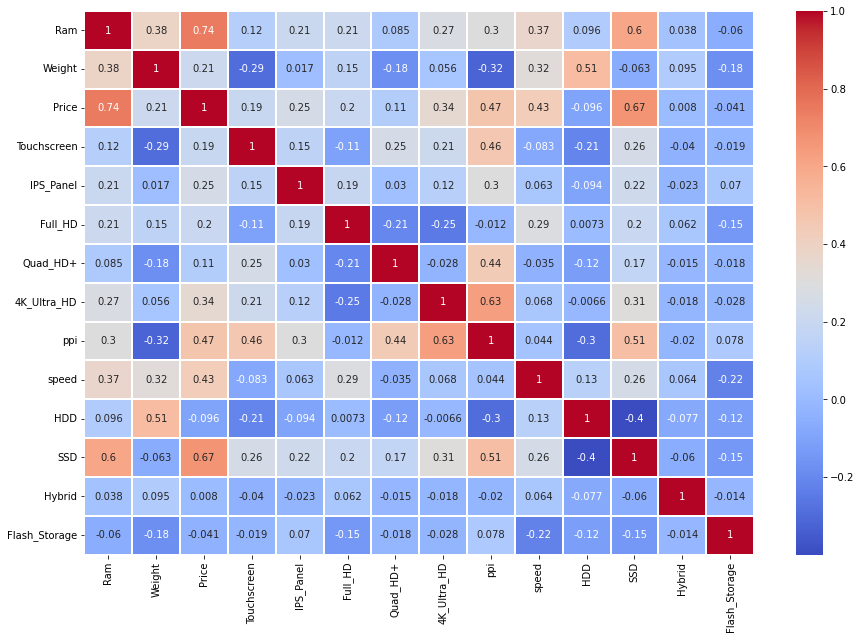

In [167]:
fig, ax = plt.subplots(figsize=(15,10)) # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.3,cmap = 'coolwarm', ax=ax)
plt.show()

<b> The observation shows that Hybrid and Flash Storage has no effect on price of laptop

In [168]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [169]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,ppi,Cpu brand,speed,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,0,0,226.983005,Intel Core i5,2.3,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,0,127.677940,Intel Core i5,1.8,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,0,0,141.211998,Intel Core i5,2.5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,0,0,220.534624,Intel Core i7,2.7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,0,0,226.983005,Intel Core i5,3.1,0,256


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float32
 6   Price        1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   IPS_Panel    1303 non-null   int64  
 9   Full_HD      1303 non-null   int64  
 10  Quad_HD+     1303 non-null   int64  
 11  4K_Ultra_HD  1303 non-null   int64  
 12  ppi          1303 non-null   float64
 13  Cpu brand    1303 non-null   object 
 14  speed        1303 non-null   float64
 15  HDD          1303 non-null   int64  
 16  SSD          1303 non-null   int64  
dtypes: float32(1), float64(3), int32(1), int64(7), object(5)
memory usage: 163.0+ KB


## 'Gpu' Column

In [171]:
df.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
Nvidia Quadro M620M          1
AMD FirePro W6150M           1
AMD Radeon R7 M365X          1
Nvidia Quadro M3000M         1
Name: Gpu, Length: 110, dtype: int64

In [172]:
df['Gpu brand'] = df.Gpu.apply(lambda x: x.split()[0])

In [173]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,ppi,Cpu brand,speed,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,0,0,226.983005,Intel Core i5,2.3,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,0,127.677940,Intel Core i5,1.8,0,0,Intel


In [174]:
df.drop(columns ='Gpu', inplace = True)

In [175]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price', 'Touchscreen',
       'IPS_Panel', 'Full_HD', 'Quad_HD+', '4K_Ultra_HD', 'ppi', 'Cpu brand',
       'speed', 'HDD', 'SSD', 'Gpu brand'],
      dtype='object')

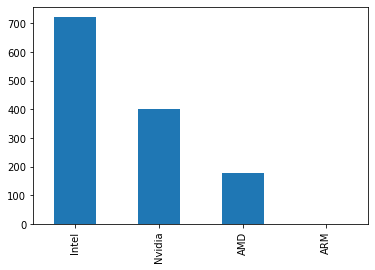

In [176]:
df['Gpu brand'].value_counts().plot(kind = 'bar')
plt.show()

In [177]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [178]:
df = df[df['Gpu brand'] != 'ARM'] # Drop ARM

In [179]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

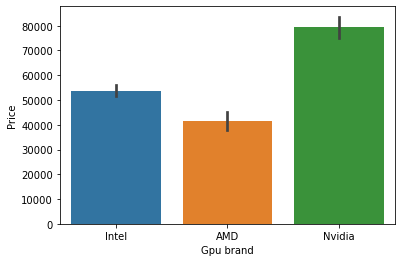

In [180]:
sns.barplot(x = 'Gpu brand', y = 'Price', data = df)
plt.show()

## 'OpenSys' Column

In [181]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

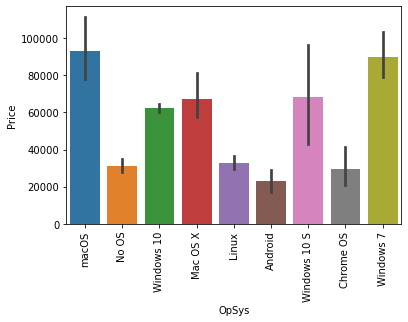

In [182]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [183]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [184]:
df['os'] = df['OpSys'].apply(cat_os)

In [185]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,ppi,Cpu brand,speed,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,0,0,0,226.983005,Intel Core i5,2.3,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,0,0,0,127.677940,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,1,0,0,141.211998,Intel Core i5,2.5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,0,0,0,220.534624,Intel Core i7,2.7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,0,0,0,226.983005,Intel Core i5,3.1,0,256,Intel,Mac


In [186]:
df.drop(columns=['OpSys'],inplace=True)

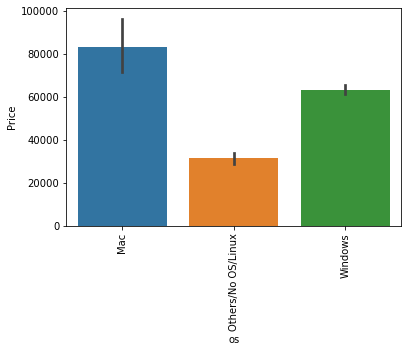

In [187]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [188]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS_Panel      0.253320
Full_HD        0.198093
Quad_HD+       0.106584
4K_Ultra_HD    0.343951
ppi            0.475368
speed          0.430122
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

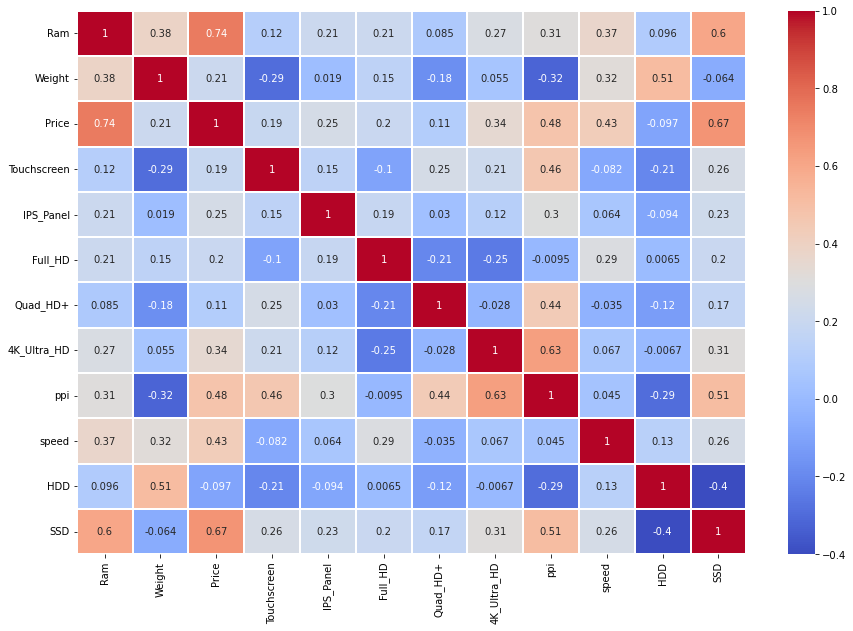

In [189]:
fig, ax = plt.subplots(figsize=(15,10)) # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.3,cmap = 'coolwarm', ax=ax)
plt.show()

In [190]:
df.describe()

,Ram,Weight,Price,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,ppi,speed,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,8.385561,2.039416,59889.058673,0.146697,0.27957,0.647465,0.023041,0.033026,146.568497,2.299002,414.101382,183.874040
std,5.085166,0.665274,37251.183866,0.353940,0.44896,0.477943,0.150093,0.178773,43.069016,0.506467,515.889348,186.969314
min,2.000000,0.690000,9270.720000,0.000000,0.00000,0.000000,0.000000,0.000000,90.583402,0.900000,0.000000,0.000000
25%,4.000000,1.500000,31914.720000,0.000000,0.00000,0.000000,0.000000,0.000000,127.335675,2.000000,0.000000,0.000000
50%,8.000000,2.040000,52107.840000,0.000000,0.00000,1.000000,0.000000,0.000000,141.211998,2.500000,0.000000,256.000000
75%,8.000000,2.300000,79303.816800,0.000000,1.00000,1.000000,0.000000,0.000000,157.350512,2.700000,1000.000000,256.000000
max,64.000000,4.700000,324954.720000,1.000000,1.00000,1.000000,1.000000,1.000000,352.465147,3.600000,2000.000000,1024.000000


In [191]:
df.to_csv('Cleaned_Laptops_Data.csv')

In [192]:
# sns.pairplot(df)

## Target Column (Price)

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

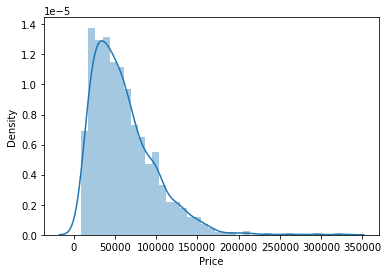

In [193]:
sns.distplot(df['Price'])

<b> Since the distribution is skewed, so convert into normal distribution after applying log transformation

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


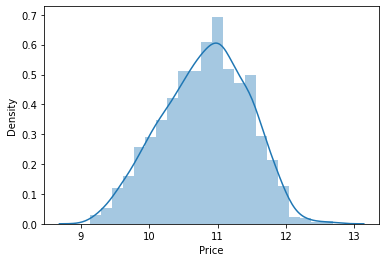

In [194]:
sns.distplot(np.log(df['Price']))
plt.show()

In [195]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [196]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,ppi,Cpu brand,speed,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,0,0,0,226.983005,Intel Core i5,2.3,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,0,0,0,127.677940,Intel Core i5,1.8,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,1,0,0,141.211998,Intel Core i5,2.5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,0,0,0,220.534624,Intel Core i7,2.7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,0,0,0,226.983005,Intel Core i5,3.1,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,1,0,0,157.350512,Intel Core i7,2.5,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,0,1,0,276.053530,Intel Core i7,2.5,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,0,0,0,111.935204,Other Intel Processor,1.6,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,0,0,0,100.454670,Intel Core i7,2.5,1000,0,AMD,Windows


In [197]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [198]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [199]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS_Panel,Full_HD,Quad_HD+,4K_Ultra_HD,ppi,Cpu brand,speed,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,0,0,0,100.454670,Intel Core i5,2.5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,1,0,0,141.211998,Intel Core i7,2.8,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,0,0,0,135.094211,Other Intel Processor,1.6,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,1,0,0,141.211998,Intel Core i3,2.3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,1,0,0,141.211998,Intel Core i5,2.5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,0,0,0,100.454670,Intel Core i3,2.0,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,1,0,0,141.211998,Intel Core i7,2.7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,0,0,0,100.454670,AMD Processor,2.5,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,0,0,0,100.454670,Intel Core i3,2.0,2000,0,Nvidia,Others/No OS/Linux


### Transformation of Categorical Features into Numerical - Using One Hot Encoding

In [200]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [201]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

#### Linear Regression

In [202]:
ct1 = ColumnTransformer(transformers =[
    ('col_tnf',OneHotEncoder(sparse = False, drop = 'first'),[0,1,10,14,15])
],remainder ='passthrough')

lr = LinearRegression()

pipe = Pipeline([
    ('Transformation',ct1),
    ('LinearRegression',lr)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.816462712002232
MAE 0.20522313224770655


In [203]:
from sklearn.model_selection import cross_val_score
print('Linear Regression: ',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

Linear Regression:  0.8269807768596229


#### Lasso Regression

In [204]:
ct = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(sparse = False, drop = 'first'),[0,1,10,14,15])
],remainder = 'passthrough')

lasso = Lasso(alpha=0.001)

pipe = Pipeline([
    ('Transformation',ct),
    ('Lasso',lasso)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8196196953647407
MAE 0.20432594203556698


In [205]:
print('Lasso Regression: ',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

Lasso Regression:  0.8182246538779012


#### Ridge Regression

In [206]:
ct = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(sparse = False, drop = 'first'),[0,1,10,14,15])
],remainder = 'passthrough')

ridge = Ridge(alpha =10)

pipe = Pipeline([
    ('Transformation', ct),
    ('Ridge',ridge)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('R2 Score', r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8202215056206655
MAE 0.2063062025098683


In [207]:
print('Ridge Regression: ',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

Ridge Regression:  0.8166079318645455


#### KNN

In [208]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,10,14,15])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8076747181388817
MAE 0.19023276292596827


In [209]:
print('KNN: ',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

KNN:  0.7738871798340121


#### Decision Tree

In [210]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,10,14,15])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8271108637259362
MAE 0.19304786983748778


In [211]:
print('Decision Tree: ',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

Decision Tree:  0.7954081308743873


#### SVM

In [212]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,10,14,15])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8244328106541469
MAE 0.1939118179037198


In [213]:
print('SVM: ',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

SVM:  0.7705292988151868


#### Random Forest

In [214]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,10,14,15])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.896064729831749
MAE 0.15516080015196895


In [215]:
print('Random Forest: ',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

Random Forest:  0.876719326627927


#### Extra Trees

In [216]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,10,14,15])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8904970029879624
MAE 0.15257585165842308


In [217]:
print('Extra Tree: ',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

Extra Tree:  0.8705423524477827


#### AdaBoost

In [218]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,10,14,15])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.805040949696795
MAE 0.22222797447920378


In [219]:
print('AdaBoost: ',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

AdaBoost:  0.7923975569443129


#### Gradient Boost

In [220]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,10,14,15])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8815068611980343
MAE 0.15289072149015911


In [221]:
print('Gradient Boost: ',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

Gradient Boost:  0.885806947475331


#### XgBoost

In [222]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,10,14,15])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.883303984043893
MAE 0.15700628404388947


In [223]:
print('XgBoost: ',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

XgBoost:  0.8776454090927608


#### Voting Regressor

In [224]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,10,14,15])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8989470097960719
MAE 0.15349693640544082


In [225]:
print('Voting Regressor: ',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

Voting Regressor:  0.8843496948922024


#### Stacking

In [226]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,10,14,15])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8868275309151441
MAE 0.16506557554651446


In [227]:
print('Stacking Regressor: ',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

Stacking Regressor:  0.8771328761296129


In [228]:
!pip install lightgbm

In [229]:
from lightgbm import LGBMRegressor

In [230]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,10,14,15])
],remainder='passthrough')

step2 = LGBMRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9121652718121505
MAE 0.14181445761222375


In [231]:
LGBMRegressor()

LGBMRegressor()

In [232]:
from sklearn.model_selection import cross_val_score
print('XGBoostLimitDepthEstimator',np.mean(cross_val_score(pipe,X_train,y_train,cv=10)))

XGBoostLimitDepthEstimator 0.8784782272213189


In [233]:
## import pickle

#pickle.dump(df,open('df.pkl','wb'))
# pickle.dump(pipe,open('pipe.pkl','wb'))